In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("policearrest.csv")

# Display the first few rows to understand the structure
df.head()


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...


In [4]:
# Drop rows missing neighborhood data
df = df.dropna(subset=['Neighborhood'])

# Standardize the neighborhood names
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

# Display how many unique neighborhoods we have
print("Number of unique neighborhoods:", df['Neighborhood'].nunique())

# Quick peek at neighborhood column
df['Neighborhood'].value_counts().head()


Number of unique neighborhoods: 91


Neighborhood
Central Business District    4310
South Side Flats             2508
East Allegheny               1418
Carrick                       886
Knoxville                     778
Name: count, dtype: int64

In [5]:
# Count the number of arrests per neighborhood
arrests_by_neighborhood = df['Neighborhood'].value_counts().reset_index()

# Rename columns for clarity
arrests_by_neighborhood.columns = ['Neighborhood', 'Arrest_Count']

# Sort from least to most arrests
arrests_by_neighborhood = arrests_by_neighborhood.sort_values(by='Arrest_Count', ascending=True)

# Display the 10 neighborhoods with the fewest arrests
arrests_by_neighborhood.head(10)


,Neighborhood,Arrest_Count
90,Chartiers,14
89,Saint Clair,15
88,Ridgemont,16
87,Swisshelm Park,17
86,Regent Square,23
85,New Homestead,28
84,East Carnegie,29
83,Oakwood,31
81,Esplen,35
82,Mount Oliver,35


In [6]:
# Identify the neighborhood with the fewest arrests
most_peaceful = arrests_by_neighborhood.iloc[0]

print(f"🏡 The most peaceful neighborhood in Pittsburgh is **{most_peaceful['Neighborhood']}**, "
      f"with only {most_peaceful['Arrest_Count']} recorded arrests!")


🏡 The most peaceful neighborhood in Pittsburgh is **Chartiers**, with only 14 recorded arrests!


/scratch/slurm-22234/ipykernel_3311000/908327545.py:18: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/software/rhel9/manual/install/jupyterhub/hub.5.2.1/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128330 (\N{DOVE OF PEACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


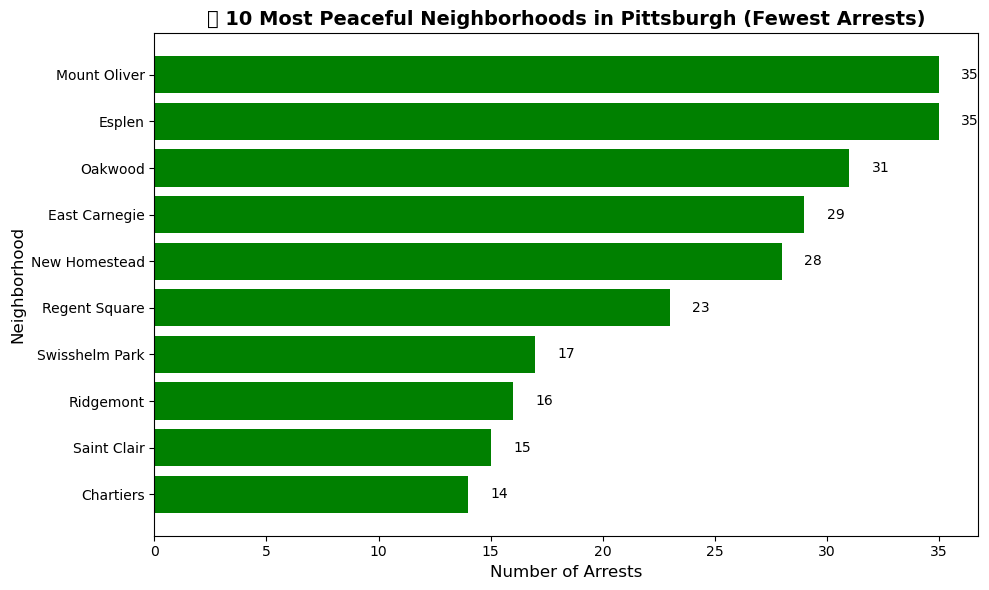

In [16]:
# Select the 10 neighborhoods with the fewest arrests
bottom_10 = arrests_by_neighborhood.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(bottom_10['Neighborhood'], bottom_10['Arrest_Count'], color='green')

# Add titles and labels
plt.title('🕊️ 10 Most Peaceful Neighborhoods in Pittsburgh (Fewest Arrests)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Arrests', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Add data labels for each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center')

plt.tight_layout()
plt.show()
